# Data Scientist Professional Practical Exam Submission


# Data Validation

The dataset contains 947 rows and 8 columns, with 5 columns having missing values before cleaning.

- recipe: Same as description, no missing values;
- calories: 52 missing values, replaced with the median of the value by category;
- carbohydrate: 52 missing values, replaced with the median of the value by category;
- sugar: 52 missing values, replaced with the median of the value by category;
- protein: 52 missing values, replaced with the median of the value by category;
- category: No missing values, but had one extra category ("Chicken Breast"). The category was renamed to "Chicken";
- servings: No missing values, but the column had the wrong type. Upon analysis, some rows had " as a snack" appended to the serving size. This string was removed and then I converted the type of the column to "int";
- high_traffic: 373 missing values, because the only value on the column was "High". Replaced all the missing values with "Low";

I verified that the nutritional values of the recipes had different medians based on the category of the recipe (for example, the sugar median was 24.65 for Desserts and 3.7 for Vegetable). So, instead of replacing the missing values of the calories, carbohydrate, sugar and protein columns with the total median of the dataset, I used the median by category to better fill in the missing values.

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

In [3]:
# Dataset loading
df = pd.read_csv("recipe_site_traffic_2212.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [5]:
# Counting nan
print(df.isna().sum())

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


In [6]:
# Checking the recipe column:

print(df['recipe'].is_unique)

True


In [7]:
# Checking the servings column:
print(df['servings'].value_counts(dropna=False))
df['servings'] = df['servings'].str.replace(" as a snack", "").astype('int')
print(df['servings'].value_counts(dropna=False))


4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64
4    391
6    198
2    183
1    175
Name: servings, dtype: int64


In [8]:
# Checking the category column:
print(df['category'].value_counts(dropna=False))
# There is one extra category, "Chicken Breast". We can rename it to Chicken
df['category'].replace("Chicken Breast","Chicken", inplace=True) 
print(df['category'].value_counts(dropna=False))


Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64
Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64


In [9]:
# Checking the high_traffic column:
print(df['high_traffic'].value_counts())
df['high_traffic'].fillna("Low", inplace=True)
print(df['high_traffic'].value_counts())

High    574
Name: high_traffic, dtype: int64
High    574
Low     373
Name: high_traffic, dtype: int64


In [10]:
# Checking the nutritional values columns:

nutrition = df[["category", "calories", 'carbohydrate', 'sugar', 'protein']]

print("min grouped")
print(nutrition.groupby("category").min(numeric_only=True))
print("max grouped")
print(nutrition.groupby("category").max(numeric_only=True))
print("median grouped")
print(nutrition.groupby("category").median(numeric_only=True))

df["calories"] = df.groupby("category")["calories"].transform(lambda x: x.fillna(x.median()))
df["carbohydrate"] = df.groupby("category")["carbohydrate"].transform(lambda x: x.fillna(x.median()))
df["sugar"] = df.groupby("category")["sugar"].transform(lambda x: x.fillna(x.median()))
df["protein"] = df.groupby("category")["protein"].transform(lambda x: x.fillna(x.median()))



min grouped
               calories  carbohydrate  sugar  protein
category                                             
Beverages          0.30          0.16   0.01     0.00
Breakfast          0.64          1.42   0.07     0.07
Chicken            0.80          0.03   0.05     0.20
Dessert            0.59          0.19   0.07     0.07
Lunch/Snacks       0.14          0.08   0.02     0.36
Meat               5.87          0.10   0.24     0.13
One Dish Meal     13.62          0.08   0.15     0.76
Pork               1.56          0.47   0.08     1.32
Potato             9.26          0.05   0.01     0.00
Vegetable          0.76          0.62   0.07     0.01
max grouped
               calories  carbohydrate   sugar  protein
category                                              
Beverages        836.95         77.70   59.04     2.55
Breakfast       1724.25        173.93   42.80    92.01
Chicken         3633.16        243.20   37.08   363.36
Dessert         1588.26        239.06  148.75    19.0

# Exploratory Analysis

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt

## Single Variable Analysis


**Graph 1 - Count of Site Traffic by Popularity** shows that there are more recipes that generated high site traffic. High traffic recipes are 60% of the dataset, which means that our dataset is slightly unbalanced.

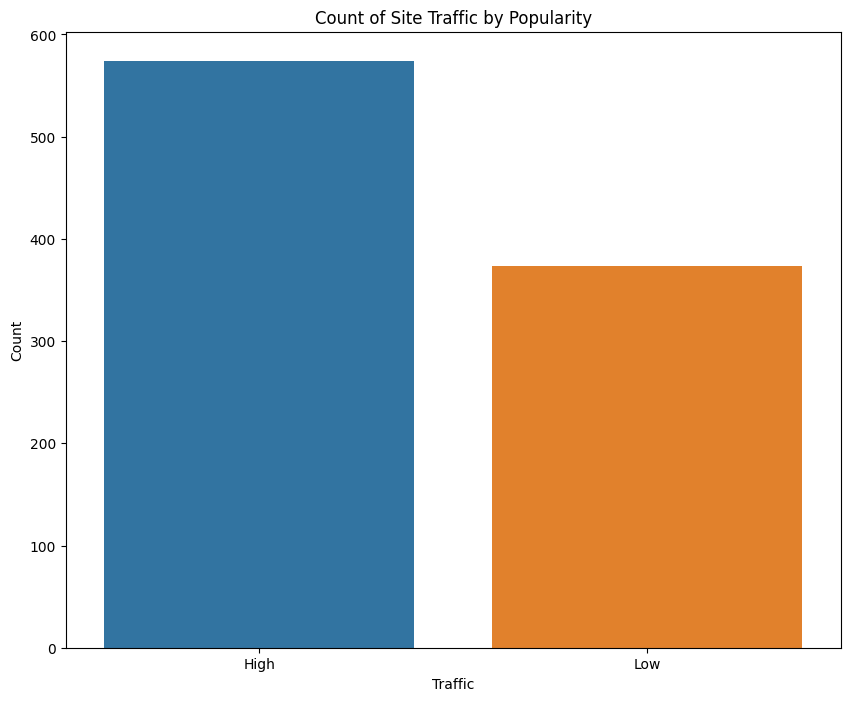

In [12]:
ax = sns.countplot(data=df,x="high_traffic")
plt.title("Count of Site Traffic by Popularity")
plt.xlabel('Traffic')
plt.ylabel('Count')
plt.show()
#print(df["high_traffic"].value_counts(normalize=True))

**Graphs 2 and 3** show that the most common category for recipes is Chicken and the most common serving size is 4, with all the other categories and serving sizes being somewhat similar.  

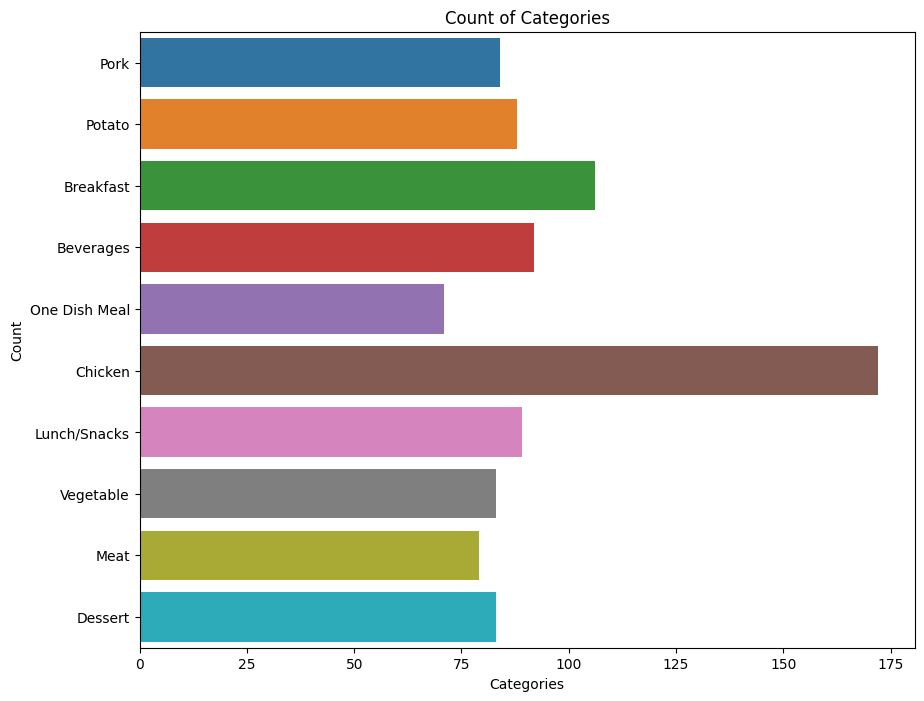

In [13]:
ax = sns.countplot(data=df,y="category")
plt.title("Count of Categories")
#plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

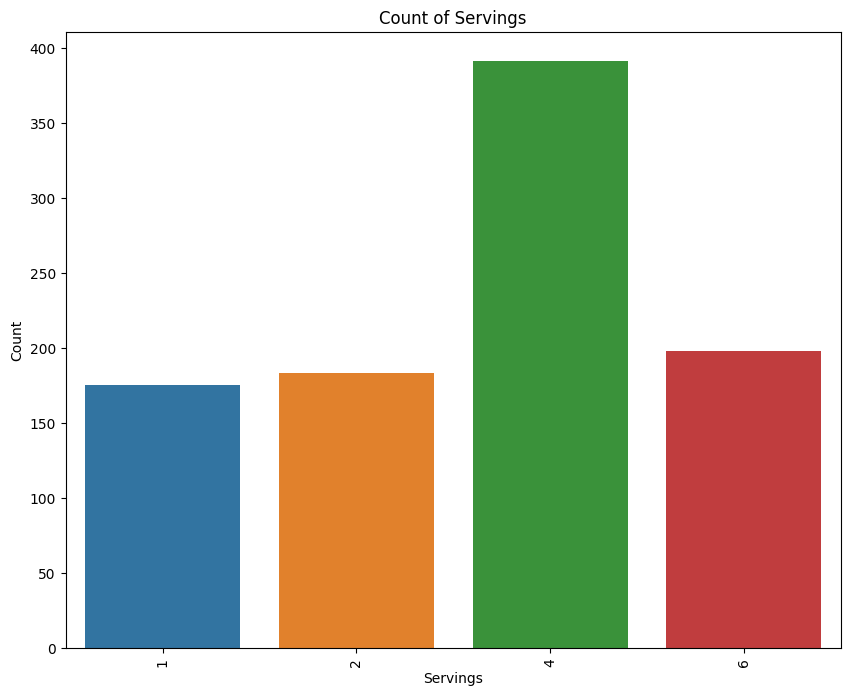

In [14]:
ax = sns.countplot(data=df,x="servings")
plt.title("Count of Servings")
plt.xticks(rotation=90)
plt.xlabel('Servings')
plt.ylabel('Count')
plt.show()

**Graphs 4, 5, 6 and 7** show the histogram plots for the nutritional values of the recipes. We can observe that there are no absurd values and that the values follow an exponential distribution.

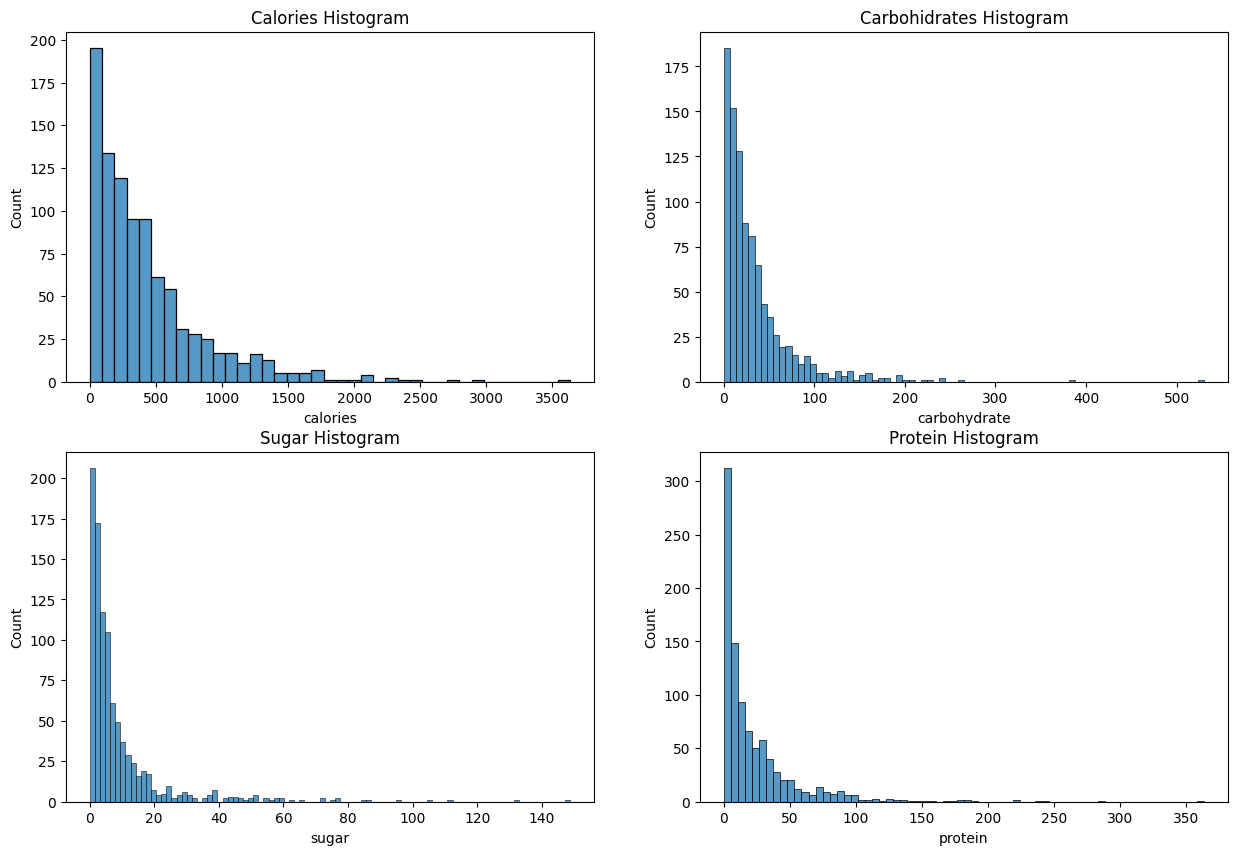

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
sns.histplot(data=df,x='calories',ax=axes[0][0]).set(title='Calories Histogram')
sns.histplot(data=df,x='carbohydrate',ax=axes[0][1]).set(title='Carbohidrates Histogram')
sns.histplot(data=df,x='sugar',ax=axes[1][0]).set(title='Sugar Histogram')
sns.histplot(data=df,x='protein',ax=axes[1][1]).set(title='Protein Histogram')

plt.show()

## Multivariable Analysis
Graph 8 shows that the recipe category can be a good predictor of high traffic. Pork, Potato and Vegetable recipes have a lot more recipes with high traffic, and One dish meal, lunch/snacks, meat and dessert have more recipes with high traffic than low. On the other hand, Chicken, breakfast, and beverage recipes seem to be less popular in terms of generating high traffic.

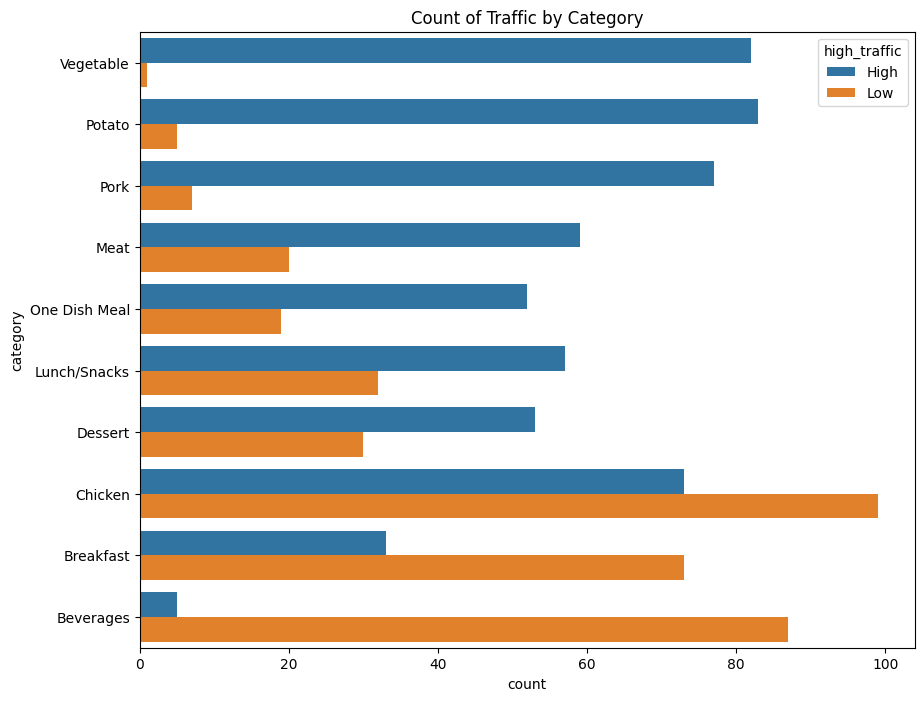

In [16]:
categories_order = df.groupby("category")['high_traffic'].value_counts(normalize=True).reset_index(name="value")
categories_order = categories_order[categories_order['high_traffic']=='High'].sort_values("value",ascending=False)['category']
sns.countplot(df, y="category", hue="high_traffic",order = categories_order)
plt.title("Count of Traffic by Category")
plt.show()


**Graph 9** shows the percentage of recipes with high and low traffic split by the servings size. The graph shows that there is no strong correlation between the servings size and recipe traffic.

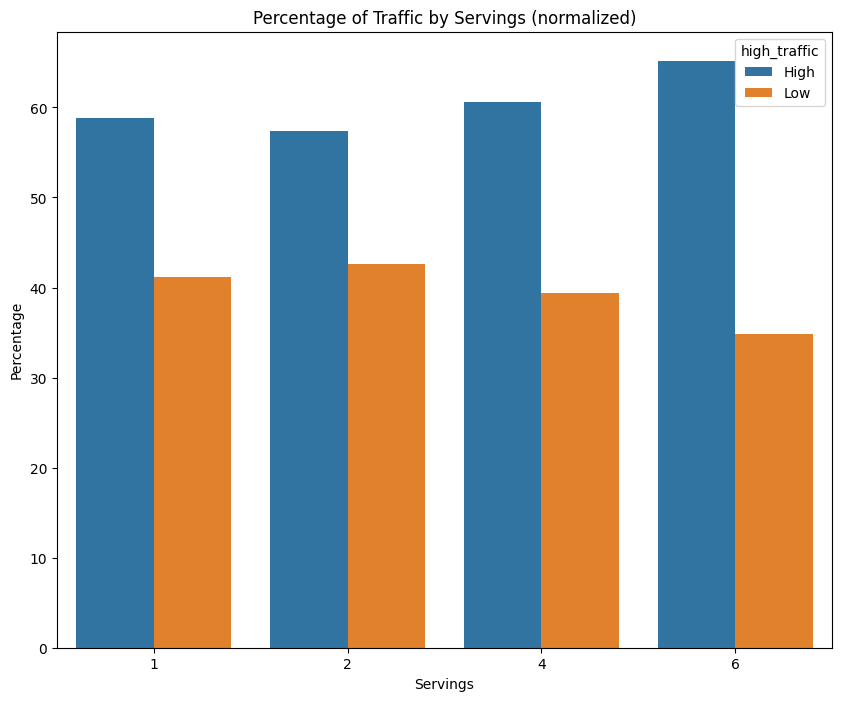

In [17]:
#sns.countplot(df, y="servings", hue="high_traffic")

servings_percentage = df.groupby("servings")['high_traffic'].value_counts(normalize=True).reset_index(name="value")
servings_percentage["Percentage"] = servings_percentage['value']*100

sns.barplot(servings_percentage,x='servings', y="Percentage", hue="high_traffic")
plt.title("Percentage of Traffic by Servings (normalized)")
plt.xlabel('Servings')

plt.show()


**Graphs 10, 11, 12 and 13** show boxplots for the nutritional numeric variables in relation to the recipe traffic. There is no strong correlation between any of the nutritional variables and the recipe traffic.

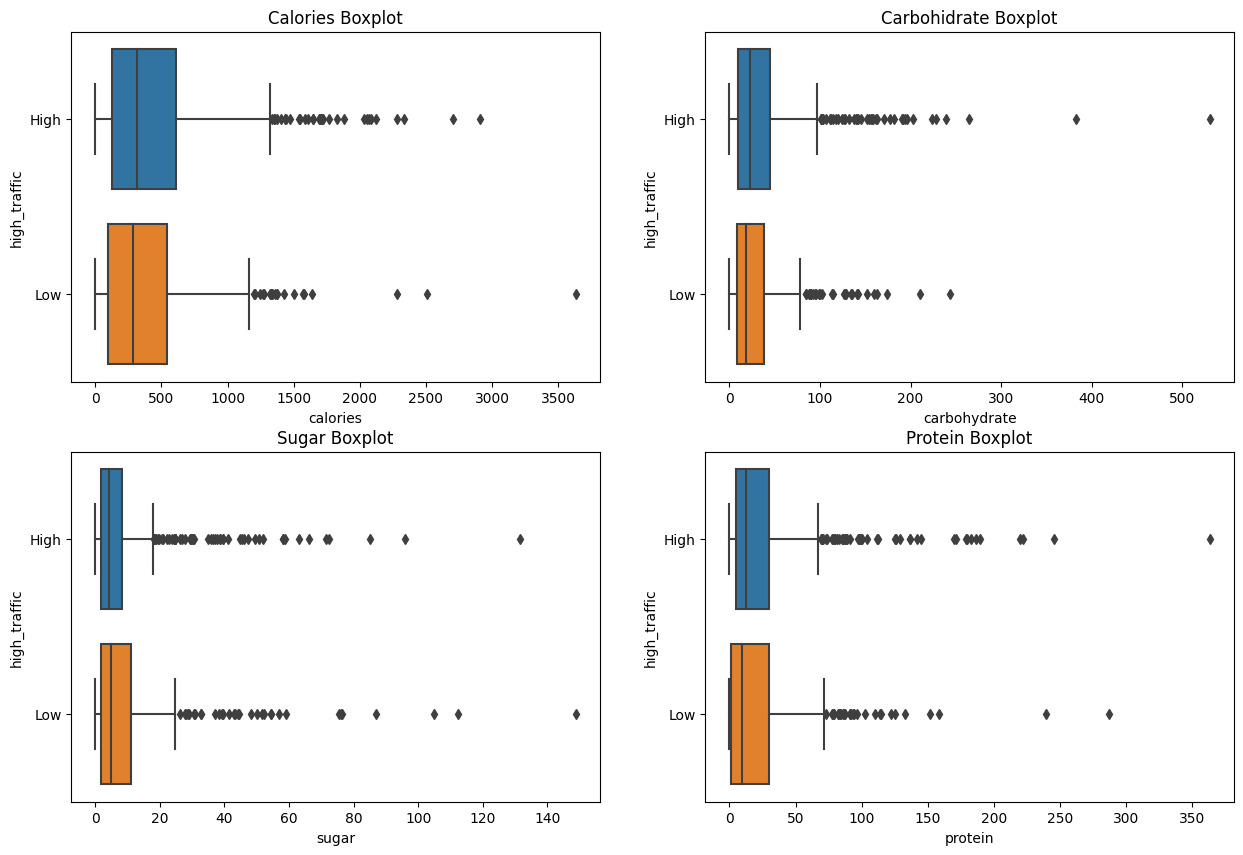

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
sns.boxplot(data=df,x='calories',y='high_traffic',ax=axes[0][0]).set(title='Calories Boxplot')
sns.boxplot(data=df,x='carbohydrate',y='high_traffic',ax=axes[0][1]).set(title='Carbohidrate Boxplot')
sns.boxplot(data=df,x='sugar',y='high_traffic',ax=axes[1][0]).set(title='Sugar Boxplot')
sns.boxplot(data=df,x='protein',y='high_traffic',ax=axes[1][1]).set(title='Protein Boxplot')

plt.show()

# Model Development

We need to predict if a recipe will result in a High (1) or Low (0) traffic. We have two possible discrete categories, so we have a **binary classification** problem.

For the baseline model, I will use a K Neighbors Classifier. This is a simple model and will provide a good baseline without the need of extensive hyperparameter tunning. For the comparison model, I will use a Logistic Regression model. This model allows for a more complex fine tunning. Both models will use StandardScaler for data scaling and the comparison model will use GridSearchCV for hyperparameter tunning. The baseline model will use the default KNN settings.

## Data Preparation

Our target variable (y) is high_traffic, and our features (X) will be the calories, carbohydrate, sugar, protein, servings and category columns. To be able to train the models, we need to encode the category column using pd.get_dummies, so that the X and y variables only have numerical data.

After that, we split our data into training and validation and use a Pipeline to include an Standard Scaler into the training and prediction of our models.

In [19]:
features = df.drop(columns=['high_traffic','recipe'])
X = pd.get_dummies(features, columns=['category'])
print(X.columns)
y = df['high_traffic'].replace({"High": 1, "Low": 0})
SEED = 1

Index(['calories', 'carbohydrate', 'sugar', 'protein', 'servings',
       'category_Beverages', 'category_Breakfast', 'category_Chicken',
       'category_Dessert', 'category_Lunch/Snacks', 'category_Meat',
       'category_One Dish Meal', 'category_Pork', 'category_Potato',
       'category_Vegetable'],
      dtype='object')


In [20]:
# Split dataset into 70% training set and 30% test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED,stratify=y)

## Baseline Model

We scale the data, then fit and predict the results using a pipeline.
****

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline_baseline = Pipeline(steps)


pipeline_baseline.fit(X_train,y_train)
y_pred_baseline = pipeline_baseline.predict(X_test)


## Comparison Model

We scale the data, then fit and predict the results using a pipeline.


In [22]:

steps = [('scaler', StandardScaler()), ('regression', LogisticRegression())]
pipeline_comparison = Pipeline(steps)
parameters_comparison = {"regression__penalty": ['l2'],
                       "regression__C": [0.001, 0.01, 0.1, 0.5, 1],
                       "regression__solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
cv_comparison = GridSearchCV(pipeline_comparison, param_grid=parameters_comparison)

cv_comparison.fit(X_train, y_train)
y_pred_comparison = cv_comparison.predict(X_test)

print(cv_comparison.best_params_)


{'regression__C': 0.5, 'regression__penalty': 'l2', 'regression__solver': 'liblinear'}


## Model Evaluation

For the model evaluation, we will use 4 metrics: precision, recall and f1-score of the "High" class, and the model accuracy.

Our baseline model based on scaling and a K Neighbors Classifier gives us a precision of 0.77, recall of 0.83 and f1-score of 0.80 for the "High" class. The model accuracy is 74.4%.

Our comparison model based on scaling, logistic regression and GridSearchCV gives us a precision of 0.84, recall of 0.85 and f1-score of 0.84 for the "High" class. The model accuracy is 81%.

This shows that our comparison model performs better on all metrics.

The Graph 14 demonstrates that the most important features on the comparison model are ones related to the category. This matches our exploratory analysis. 

In [23]:
print("Report for the baseline model:\n", classification_report(y_test, y_pred_baseline))
print('Accuracy score of the baseline model on test data: ', accuracy_score(y_pred_baseline, y_test))


print("Report for the baseline model:\n", classification_report(y_test, y_pred_comparison))
print('Accuracy score of the comparison model on test data: ', accuracy_score(y_pred_comparison, y_test))

Report for the baseline model:
               precision    recall  f1-score   support

           0       0.70      0.61      0.65       112
           1       0.77      0.83      0.80       173

    accuracy                           0.74       285
   macro avg       0.73      0.72      0.72       285
weighted avg       0.74      0.74      0.74       285

Accuracy score of the baseline model on test data:  0.743859649122807
Report for the baseline model:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       112
           1       0.84      0.85      0.84       173

    accuracy                           0.81       285
   macro avg       0.80      0.80      0.80       285
weighted avg       0.81      0.81      0.81       285

Accuracy score of the comparison model on test data:  0.8105263157894737


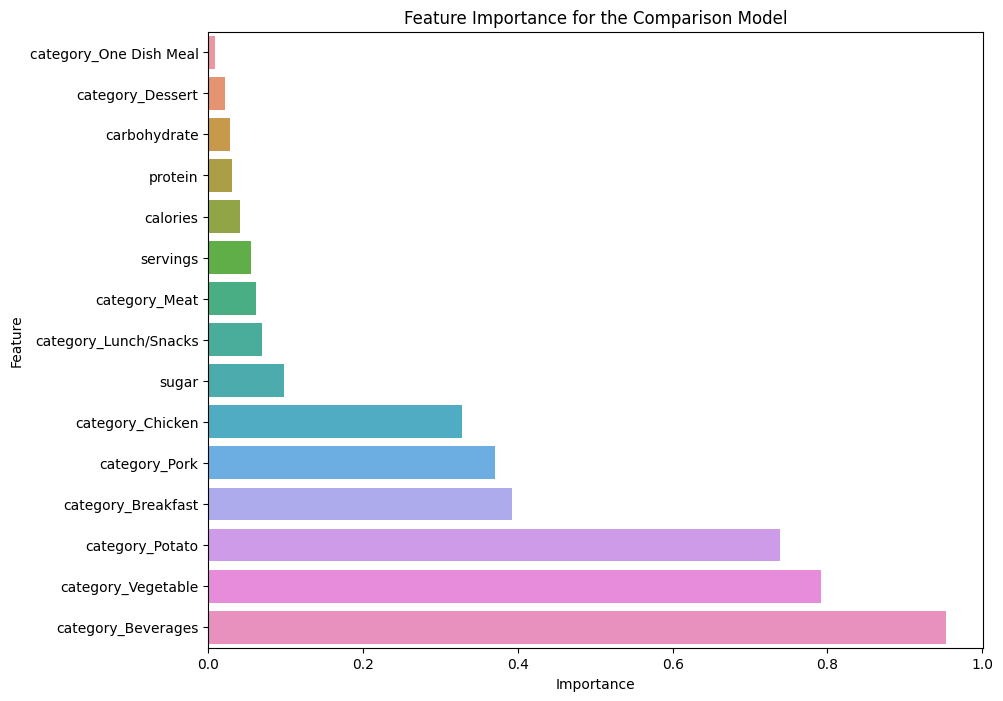

In [24]:
import numpy as np
coefficients = cv_comparison.best_estimator_['regression'].coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title("Feature Importance for the Comparison Model")
plt.show()

# Business Metrics

The Questions asked by the product manager were if we could:
- Predict which recipes will lead to high traffic;
- Correctly predict high traffic recipes 80% of the time;

In order to fulfill these requirements, we need a model with an accuracy higher than 80%. Accuracy is a metric that measures the ratio of correctly predicted samples to the total number of samples in a dataset.

Our comparison model, which utilizes Logistic Regression, surpasses the desired threshold with an accuracy of 81%. This indicates that it is capable of delivering the desired results. The baseline model accuracy is 74.4%, so it falls short of meeting the designated threshold.

# Final summary

Given that our Logistic Regression can correctly predict high traffic recipes more than 80% of the time, we can start working on the deployment of the current model into production.

Following the deployment, we can dedicate our efforts towards enhancing the model through various means, including:


- Increasing the sample size, recording the performance and characteristics of the recipes;
- Collecting new categories of data, such as time to make, cost, complexity, ingredients and user reviews;
- Work on feature engineering and model architecture, to further optimize our model;

These improvement initiatives will enable us to optimize our model even further and enhance its predictive capabilities.
